# Multi-model Advanced Regression:  House Prices

 Predict sales prices and practice feature engineering, RFs, and gradient boosting
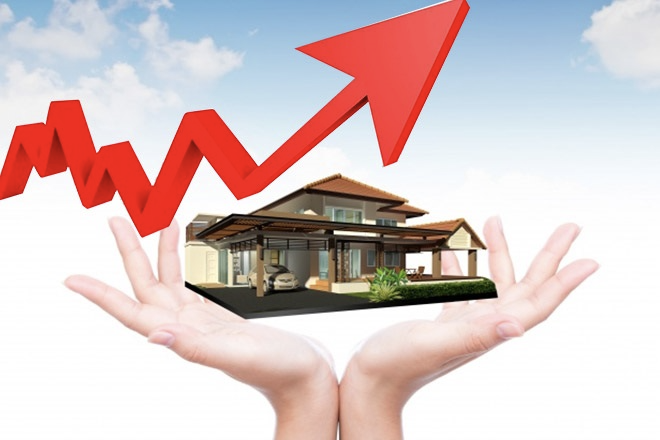
 
 

 ## Importing libraries

In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train =pd.read_csv(os.path.join(dirname,'train.csv'))
test =pd.read_csv(os.path.join(dirname,'test.csv'))

test_ID = test['Id']
train=train.drop("Id",axis=1)
test=test.drop("Id",axis=1)

# print(np.shape(train),np.shape(test))



## Visualizing Scatter plots of various features with *target* SalePrice

In [ ]:
plt.scatter(train['OpenPorchSF'],train['SalePrice'])
plt.xlabel('OpenPorchSF',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

In [ ]:
plt.scatter(train['BsmtFinSF1'],train['SalePrice'])
plt.xlabel('BsmtFinSF1',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

In [ ]:
plt.scatter(train['YearBuilt'],train['SalePrice'])
plt.xlabel('YearBuilt',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

In [ ]:
plt.scatter(train['OverallCond'],train['SalePrice'])
plt.xlabel('OverallCond',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

In [ ]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.xlabel('TotalBsmtSF',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

In [ ]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.xlabel('GrLivArea',fontsize=13)
plt.ylabel('SalePrice',fontsize=13)

### Removing potential Outlier data points { After careful analysis of the above scatter plots }

In [ ]:

train=train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index)

train=train.drop(train[(train['BsmtFinSF1']>5000) & (train['SalePrice']<300000)].index)

train=train.drop(train[(train['YearBuilt']<1900) & (train['SalePrice']>400000)].index)

train=train.drop(train[(train['OverallCond']==2) & (train['SalePrice']>300000)].index)

train=train.drop(train[(train['TotalBsmtSF']>3000) & (train['SalePrice']<300000)].index)

train=train.drop(train[(train['GrLivArea']>3000) & (train['SalePrice']<300000)].index)

### Now lets analyse our target i.e **SalePrice**, and see how it is distributed

In [ ]:
from scipy.stats import norm
sns.distplot(train["SalePrice"],fit=norm)
mu,sigma= norm.fit(train['SalePrice'])
print("mu {}, sigma {}".format(mu,sigma))

### As we can see that *target* is right skewed, we will perform log transform 

In [ ]:
########## REMOVING SKEWEENESS ###########
train['SalePrice']=np.log1p(train['SalePrice'])
sns.distplot(train["SalePrice"],fit=norm)
mu,sigma= norm.fit(train['SalePrice'])
print("mu {}, sigma {}".format(mu,sigma))

In [ ]:
ytrain=train.SalePrice.values

In [ ]:
# Concatenating train + test= all_data
all_data=pd.concat((train,test)).reset_index(drop=True)

In [ ]:
all_data=all_data.drop('SalePrice',axis=1)


In [ ]:
print(np.shape(all_data))

### *Missing values*:-
### We have a lot of features to handel (81 in total), so there is a potential chance for missing values

In [ ]:
miss=all_data.isnull().sum()
miss=miss[miss>0]
miss=miss.sort_values(ascending=False)
print(miss)

In [ ]:
all_data['PoolQC']=all_data['PoolQC'].fillna("None")
all_data['MiscFeature']=all_data['MiscFeature'].fillna("None")
all_data['Alley']=all_data['Alley'].fillna("None")
all_data['Fence']=all_data['Fence'].fillna("None")
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageQual','GarageCond','GarageFinish','GarageType'):
    all_data[col]=all_data[col].fillna("None")
# Garageyrbuilt !!!!!!!!!    
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col]=all_data[col].fillna(0)
    


In [ ]:
for col in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col]=all_data[col].fillna("None")
for col in ('BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'):
    all_data[col]=all_data[col].fillna(0)
  

In [ ]:
miss=all_data.isnull().sum()
miss=miss[miss>0]
miss=miss.sort_values(ascending=False)
print(miss)

In [ ]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna("None")
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data=all_data.drop(['Utilities'],axis=1)
all_data['Functional']=all_data['Functional'].fillna("Typ")
all_data['SaleType']=all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['Exterior1st']=all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


In [ ]:
miss=all_data.isnull().sum()
miss=miss[miss>0]
miss=miss.sort_values(ascending=False)
print(miss)

In [ ]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
########################### MISSING VALUES HANDLED ########################

In [ ]:
print(np.shape(all_data))

In [ ]:
#CHANGED
all_data=all_data.drop(['Street'],axis=1)

In [ ]:
#CHANGED
all_data=all_data.drop(['PoolQC'],axis=1)

In [ ]:
############# Numerically represented categorical values .    NEED TO CONVERT THESE TO CATEGORICAL      ########################
# MSSubClass OverallQual  OverallCond   YearBuilt   YearRemodAdd    BsmtFullBath   BsmtHalfBath   FullBath   HalfBath   BedroomAbvGr  KitchenAbvGr   TotRmsAbvGrd   Fireplaces   GarageYrBlt   GarageCars   MoSold   YrSold   

## *Numerically represented categorical values*:-

### Some of the features are represented in numbers<int64>, when they should be in 'string' representing categorical features

In [ ]:
#CHANGED
for col in ('MSSubClass' ,   'OverallCond'  ,'OverallQual', 'BedroomAbvGr',  'KitchenAbvGr', 'BsmtFullBath',   'BsmtHalfBath',   'FullBath',   'HalfBath' ,    'TotRmsAbvGrd' ,  'Fireplaces',   'GarageYrBlt',   'GarageCars'  , 'MoSold' ,  'YrSold'):
    all_data[col]=all_data[col].astype(str)

In [ ]:
# CATEGORICAL

# ('MSSubClass', 'OverallQual',  'OverallCond' ,   'YearRemodAdd',    'BsmtFullBath',   'BsmtHalfBath',   'FullBath',   'HalfBath' ,  'BedroomAbvGr',  'KitchenAbvGr',   'TotRmsAbvGrd' ,  'Fireplaces',   'GarageYrBlt',   'GarageCars'  , 'MoSold' ,  'YrSold','MSZoning','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition', 'YearBuilt')

In [ ]:
# CATEGORICAL Features
c=('MSSubClass', 'OverallQual',  'OverallCond' ,   'YearRemodAdd',    'BsmtFullBath',   'BsmtHalfBath',   'FullBath',   'HalfBath' ,  'BedroomAbvGr',  'KitchenAbvGr',   'TotRmsAbvGrd' ,  'Fireplaces',   'GarageYrBlt',   'GarageCars'  , 'MoSold' ,  'YrSold','MSZoning','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition', 'YearBuilt')


In [ ]:

cat_list=list(c)


## *LABEL ENCODING OF CATEGORICAL FEATURES*:-

### Label encoding categorical features as 'SalePrice'  depend on the individual order in which these categorical features are given

In [ ]:
######## LABEL ENCODING OF ALL CATEGORICAL FEATURES ###########
from sklearn.preprocessing import LabelEncoder
for i in cat_list:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[i].values)) 
    all_data[i] = lbl.transform(list(all_data[i].values))

In [ ]:
# Numerical_cols= all_data.columns-CategoricalColumns
numeric_col=[]
for col in all_data.columns:
    if(col not in cat_list):
        numeric_col.append(col)

### Now let's handel skew in all numerical features

In [ ]:
skew=all_data[numeric_col].skew()

In [ ]:
print(skew)

 ### *Observation*:-   All of them have positive skew

In [ ]:
skew=skew[abs(skew) > 0.75]
print(len(skew))

### Again using log transformation to remove skewness {as all of the numerical features have positive skew}

In [ ]:
from scipy.special import boxcox1p
lam=0.15
for i in skew.index:
    all_data[i]=np.log1p(all_data[i])

### **Normalizing NUMERICAL_COLUMNS to be between [0,1]**

In [ ]:
########### NORMALIZING NUMERIC FEATURES ####################
for col in numeric_col:
    m=np.mean(all_data[col])
    ma=np.max(all_data[col])
    mi=np.min(all_data[col])
    all_data[col]=(all_data[col]-m)/(ma-mi)
    

In [ ]:
all_data=pd.get_dummies(all_data)
print(np.shape(all_data))

In [ ]:
######### test + train = all_data ######
q=np.shape(ytrain)[0]
train=all_data[:q]
test=all_data[q:]

In [ ]:
print(np.shape(train),np.shape(test))

In [ ]:
print(len(test.columns),len(train.columns))

In [ ]:
######## train = xtrain , val ###########
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(train, ytrain, test_size=0.33,
                                                      random_state=0)
####################################### CHANGED TEST SIZE ##############################################

In [ ]:
print('''XTRAIN {}   
XVAL{}   
XTEST{}'''.format(np.shape(xtrain),np.shape(xval),np.shape(test)))

In [ ]:
from sklearn.model_selection import cross_val_score

## *USING Multiple Models for final prediction* :-

### Now I'll be using variour regression models and then will take their weighted average for final prediction on *test*

In [ ]:
# ########## lasso ######### {update :- it didn't help}
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# lasso = make_pipeline(RobustScaler(), Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.00001, warm_start=False, positive=False, random_state=None, selection='cyclic'))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet,BayesianRidge
from sklearn.preprocessing import RobustScaler
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.03, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor

In [ ]:
######### CV #########

#previous 1000
scores=-1 * cross_val_score(XGBRegressor(n_estimators=2200,learning_rate=0.05),xtrain,ytrain,cv=5,scoring="neg_mean_absolute_error")

In [ ]:
val_score=scores.mean()

In [ ]:
print(val_score)

In [ ]:
#LASSO
# model1=lasso
# model1.fit(xtrain,ytrain)

In [ ]:
#LGB
model_lgb.fit(xtrain,ytrain)

In [ ]:
#GrBOOST
GBoost.fit(xtrain,ytrain)

In [ ]:
#KKR
KRR.fit(xtrain,ytrain)

In [ ]:
#ENET
ENet.fit(xtrain,ytrain)


In [ ]:
#XGBOOST
model=XGBRegressor(n_estimators=2200,learning_rate=0.05)
model.fit(xtrain,ytrain)#,early_stopping_rounds=5,eval_set=[(xval,yval)],verbose=False)

In [ ]:
x=model.predict(test)

In [ ]:
# y=model1.predict(test)
# y=np.expm1(y)

In [ ]:
x=np.expm1(x)

In [ ]:
z=model_lgb.predict(test)
z=np.expm1(z)

In [ ]:
q=GBoost.predict(test)
q=np.expm1(q)

In [ ]:
w=KRR.predict(test)
w=np.expm1(w)

In [ ]:
e=ENet.predict(test)
e=np.expm1(e)

In [ ]:
x=(0.15*x+0.15*z)+0.7*(q+e+w)/3


In [ ]:
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': x})
output.to_csv('submission.csv', index=False)

In [ ]:
print("That's all Folks !")